In [182]:
import numpy as np
import pandas as pd
import requests
import json
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import kaleido
import plotly

## Define search engine version

In [23]:
if "SEARCH_VERSION" not in locals():
    SEARCH_VERSION = "new"
else:
    print(SEARCH_VERSION)

V1.1


In [178]:
SEARCH_VERSION

1.1

## Import lastest elastic data

In [31]:
df_test = pd.read_csv("./data/elastic_wars.csv", dtype=str)

In [32]:
df_test.head(3)

,terms,siren,results_elastic,pages_elastic,siren_elastic,resp_time_elastic,results_postgres,pages_postgres,siren_postgres,resp_time_postgres,results_postges,pages_postges,rank_elastic,rank_postgres,results_elastic_1,pages_elastic_1,siren_elastic_1,resp_time_elastic_1,rank_elastic_1
0,stellantis,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.063221,1,1,['879786085'],0.042676,1,1,0,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.131647,0
1,STELLANTIS,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.146982,1,1,['879786085'],0.065058,1,1,0,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.045476,0
2,Stellantis,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.084343,1,1,['879786085'],0.042565,1,1,0,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.077246,0


In [78]:
df_test.columns

Index(['terms', 'siren', 'results_elastic', 'pages_elastic', 'siren_elastic',
       'resp_time_elastic', 'results_postgres', 'pages_postgres',
       'siren_postgres', 'resp_time_postgres', 'results_postges',
       'pages_postges', 'rank_elastic', 'rank_postgres', 'results_elastic_1',
       'pages_elastic_1', 'siren_elastic_1', 'resp_time_elastic_1',
       'rank_elastic_1'],
      dtype='object')

In [79]:
df_test.shape

(928, 19)

In [35]:
df_test.dtypes

terms                  object
siren                  object
results_elastic        object
pages_elastic          object
siren_elastic          object
resp_time_elastic      object
results_postgres       object
pages_postgres         object
siren_postgres         object
resp_time_postgres     object
results_postges        object
pages_postges          object
rank_elastic           object
rank_postgres          object
results_elastic_1      object
pages_elastic_1        object
siren_elastic_1        object
resp_time_elastic_1    object
rank_elastic_1         object
dtype: object

## Call last search functions (maybe add description)

In [36]:
def find(key, dictionary):
    for k, v in dictionary.items():
        if k == key:
            yield v
        elif isinstance(v, dict):
            for result in find(key, v):
                yield result
        elif isinstance(v, list):
            for d in v:
                for result in find(key, d):
                    yield result

In [37]:
def get_response(url, q):
    params["q"] = q
    response = requests.get(url, params=params)
    time_elapsed = response.elapsed.total_seconds()
    content = json.loads(response.content)
    total_results = content[0]["total_results"]
    total_pages = content[0]["total_pages"]
    siren_list = list(find("siren", content[0]))
    return total_results, total_pages, siren_list, time_elapsed

In [38]:
url_elastic = "http://api.sirene.dataeng.etalab.studio/search"

In [39]:
# Get first 20 results
params = {"q": "", "page": "1", "per_page": "20"}

In [41]:
df_test[f"results_elastic_{SEARCH_VERSION}"],\
df_test[f"pages_elastic_{SEARCH_VERSION}"],\
df_test[f"siren_elastic_{SEARCH_VERSION}"],\
df_test[f"resp_time_elastic_{SEARCH_VERSION}"] = ("", "", "", "")

In [42]:
df_test.columns

Index(['terms', 'siren', 'results_elastic', 'pages_elastic', 'siren_elastic',
       'resp_time_elastic', 'results_postgres', 'pages_postgres',
       'siren_postgres', 'resp_time_postgres', 'results_postges',
       'pages_postges', 'rank_elastic', 'rank_postgres', 'results_elastic_1',
       'pages_elastic_1', 'siren_elastic_1', 'resp_time_elastic_1',
       'rank_elastic_1', 'results_elastic_1.1', 'pages_elastic_1.1',
       'siren_elastic_1.1', 'resp_time_elastic_1.1'],
      dtype='object')

In [43]:
df_test.head(3)

,terms,siren,results_elastic,pages_elastic,siren_elastic,resp_time_elastic,results_postgres,pages_postgres,siren_postgres,resp_time_postgres,...,rank_postgres,results_elastic_1,pages_elastic_1,siren_elastic_1,resp_time_elastic_1,rank_elastic_1,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1
0,stellantis,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.063221,1,1,['879786085'],0.042676,...,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.131647,0,,,,
1,STELLANTIS,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.146982,1,1,['879786085'],0.065058,...,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.045476,0,,,,
2,Stellantis,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.084343,1,1,['879786085'],0.042565,...,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.077246,0,,,,


In [181]:
for index, row in df_test.iterrows():
    (
        df_test[f"results_elastic_{SEARCH_VERSION}"][index],
        df_test[f"pages_elastic_{SEARCH_VERSION}"][index],
        df_test[f"siren_elastic_{SEARCH_VERSION}"][index],
        df_test[f"resp_time_elastic_{SEARCH_VERSION}"][index],
    ) = get_response(url_elastic, row["terms"])

In [50]:
df_test

,terms,siren,results_elastic,pages_elastic,siren_elastic,resp_time_elastic,results_postgres,pages_postgres,siren_postgres,resp_time_postgres,...,rank_postgres,results_elastic_1,pages_elastic_1,siren_elastic_1,resp_time_elastic_1,rank_elastic_1,results_elastic_1.1,pages_elastic_1.1,siren_elastic_1.1,resp_time_elastic_1.1
0,stellantis,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.063221,1,1,['879786085'],0.042676,...,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.131647,0,1383,70,"[879786085, 803902485, 500019898, 379118748, 7...",0.042709
1,STELLANTIS,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.146982,1,1,['879786085'],0.065058,...,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.045476,0,1383,70,"[879786085, 803902485, 500019898, 379118748, 7...",0.041482
2,Stellantis,879786085,1353,68,"['879786085', '803902485', '879147148', '34219...",0.084343,1,1,['879786085'],0.042565,...,0,1353,68,"['879786085', '803902485', '379118748', '75231...",0.077246,0,1383,70,"[879786085, 803902485, 500019898, 379118748, 7...",0.040855
3,air france,420495178,706,36,"['420495178', '314119504', '378006027', '77568...",0.271584,788,40,"['883454803', '824718910', '401867015', '84159...",0.255068,...,6,1129,57,"['420495178', '632041042', '314119504', '37800...",0.062059,0,1177,59,"[420495178, 632041042, 314119504, 378006027, 7...",0.06589
4,Air france,420495178,706,36,"['420495178', '314119504', '378006027', '77568...",0.067208,788,40,"['883454803', '824718910', '401867015', '84159...",0.104733,...,6,1129,57,"['420495178', '632041042', '314119504', '37800...",0.107978,0,1177,59,"[420495178, 632041042, 314119504, 378006027, 7...",0.077272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,pontecaille gregoire,818452476,1,1,['818452476'],0.141171,1,1,['818452476'],0.039299,...,0,1,1,['818452476'],0.048877,0,1,1,[818452476],0.043938
924,sherpa,393825229,2870,144,"['393825229', '801698242', '500913785', '33407...",0.103189,330,17,"['344857321', '484513593', '398939744', '33813...",0.07168,...,15,2982,150,"['801698242', '515198844', '449614189', '39382...",0.043074,3,3028,152,"[801698242, 515198844, 449614189, 531666956, 9...",0.037458
925,sherpa,500913785,2870,144,"['393825229', '801698242', '500913785', '33407...",0.137308,330,17,"['344857321', '484513593', '398939744', '33813...",0.070307,...,-1,2982,150,"['801698242', '515198844', '449614189', '39382...",0.087631,4,3028,152,"[801698242, 515198844, 449614189, 531666956, 9...",0.037149
926,mc animation,820552925,3,1,"['820552925', '440736965', '398015974']",0.047684,4,1,"['820552925', '440736965', '398015974', '50865...",0.047149,...,0,5,1,"['820552925', '440736965', '398015974', '50865...",0.021864,0,9,1,"[820552925, 440736965, 398015974, 528547409, 8...",0.018714


In [56]:
elastic_columns = [col for col in df_test.columns if 'elastic' in col and ('result' in col or 'pages' in col or 'resp_time' in col)]

In [57]:
elastic_columns

['results_elastic',
 'pages_elastic',
 'resp_time_elastic',
 'results_elastic_1',
 'pages_elastic_1',
 'resp_time_elastic_1',
 'results_elastic_1.1',
 'pages_elastic_1.1',
 'resp_time_elastic_1.1']

In [60]:
for col in elastic_columns:
    df_test[col] = df_test[col].astype("float64")

In [61]:
df_test.dtypes

terms                     object
siren                     object
results_elastic          float64
pages_elastic            float64
siren_elastic             object
resp_time_elastic        float64
results_postgres          object
pages_postgres            object
siren_postgres            object
resp_time_postgres        object
results_postges           object
pages_postges             object
rank_elastic              object
rank_postgres             object
results_elastic_1        float64
pages_elastic_1          float64
siren_elastic_1           object
resp_time_elastic_1      float64
rank_elastic_1            object
results_elastic_1.1      float64
pages_elastic_1.1        float64
siren_elastic_1.1         object
resp_time_elastic_1.1    float64
dtype: object

In [62]:
df_test.describe()

,results_elastic,pages_elastic,resp_time_elastic,results_elastic_1,pages_elastic_1,resp_time_elastic_1,results_elastic_1.1,pages_elastic_1.1,resp_time_elastic_1.1
count,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000
mean,1192.389009,60.338362,0.115209,1224.755388,61.913793,0.062363,1234.367457,62.392241,0.046484
std,2865.904545,143.351552,0.073632,2878.074095,143.965180,0.031763,2888.162538,144.472291,0.023826
min,0.000000,1.000000,0.033094,0.000000,1.000000,0.018051,0.000000,1.000000,0.009341
25%,2.000000,1.000000,0.067629,3.000000,1.000000,0.040811,3.750000,1.000000,0.031379
50%,12.000000,1.000000,0.091565,23.000000,2.000000,0.053917,25.000000,2.000000,0.040901
75%,234.000000,12.000000,0.130058,266.250000,14.000000,0.077933,269.000000,14.000000,0.055135
max,10000.000000,501.000000,0.524740,10000.000000,501.000000,0.324647,10000.000000,501.000000,0.164046


In [177]:
df_test.describe().to_csv(f"./output/describe/describe_{SEARCH_VERSION}.csv", header=True, index=True)

## Ranks

In [63]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = ""

In [64]:
for ind, row in df_test.iterrows():
    if str(row["siren"]) in row[f"siren_elastic_{SEARCH_VERSION}"]:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = row[f"siren_elastic_{SEARCH_VERSION}"].index(str(row["siren"]))
    else:
        df_test[f"rank_elastic_{SEARCH_VERSION}"][ind] = -1

In [67]:
df_test[f"rank_elastic_{SEARCH_VERSION}"] = df_test[f"rank_elastic_{SEARCH_VERSION}"].astype('int32')

## KPIs

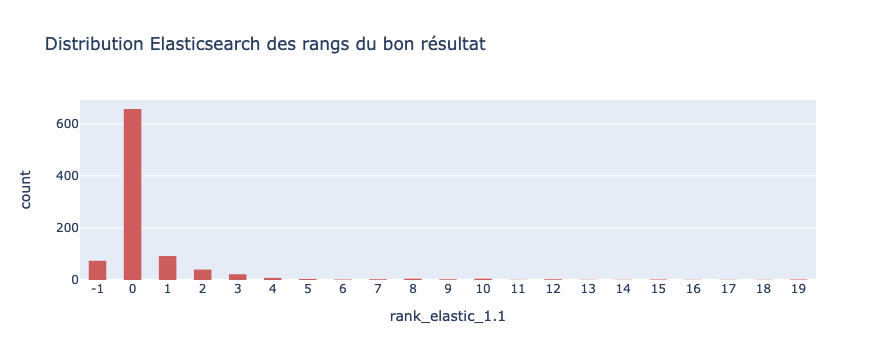

'./output/plots/rank_1.1.html'

In [179]:
fig = px.histogram(
    df_test.sort_values(by=[f"rank_elastic_{SEARCH_VERSION}"]),
    x=f"rank_elastic_{SEARCH_VERSION}",
    color_discrete_sequence=["indianred"],
    title="Distribution Elasticsearch des rangs du bon résultat",
)
fig.update_layout(bargap=0.5)
fig.update_xaxes(type="category")
fig.show()
plotly.offline.plot(fig, filename=f"./output/plots/rank_{SEARCH_VERSION}.html")

In [69]:
rank_columns = [col for col in df_test.columns if 'rank_elastic' in col]

In [70]:
rank_columns

['rank_elastic', 'rank_elastic_1', 'rank_elastic_1.1']

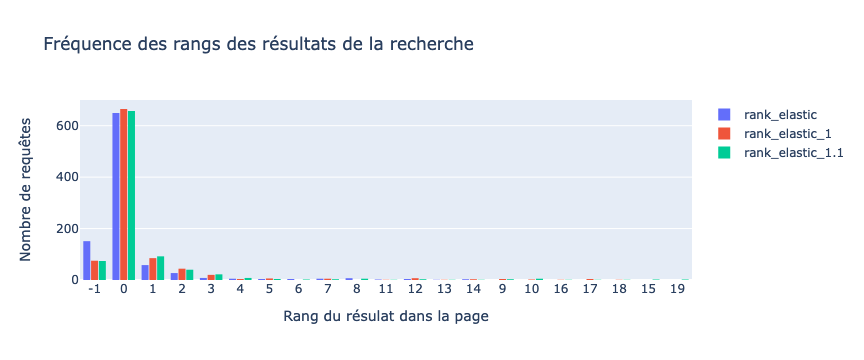

'./output/plots/ranks_1.1.html'

In [180]:
fig = go.Figure()
rank_dict = {}
for rank in rank_columns:
    df_test[rank] = df_test[rank].astype('int32')
    rank_dict[rank] = df_test.sort_values(by=[rank])[rank]
    fig.add_trace(
    go.Histogram(
        histfunc="count",
        x=rank_dict[rank],
        name=rank,
    )
    )
fig.update_layout(
    title_text="Fréquence des rangs des résultats de la recherche",  # title of plot
    xaxis_title_text="Rang du résulat dans la page",  # xaxis label
    yaxis_title_text="Nombre de requêtes",  # yaxis label
    bargap=0.2,  # gap between bars of adjacent location coordinates
    bargroupgap=0.1,  # gap between bars of the same location coordinates
)
fig.update_xaxes(type="category")
fig.show()
#fig.write_image(f"./output/plots/rank_{SEARCH_VERSION}.png")
plotly.offline.plot(fig, filename=f"./output/plots/rank_war_{SEARCH_VERSION}.html")

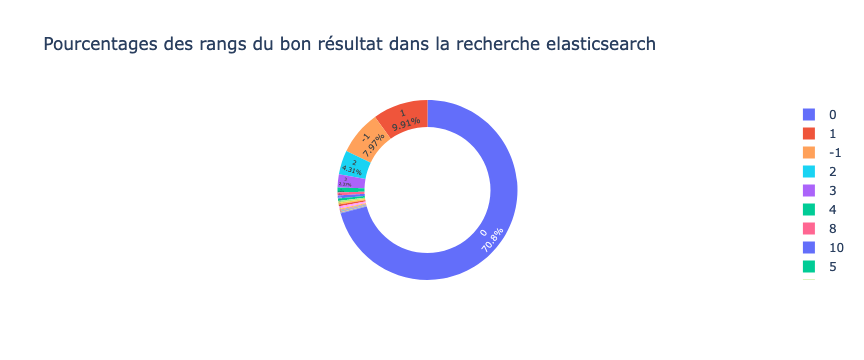

'./output/plots/pie_1.1.html'

In [174]:
fig = px.pie(
    df_test,
    names=rank_columns[-1],
    hole=0.7,
    color=rank_columns[-1],
    title="Pourcentages des rangs du bon résultat dans la recherche elasticsearch",
)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()
plotly.offline.plot(fig, filename=f"./output/plots/pie_{SEARCH_VERSION}.html")

In [85]:
df_test.to_csv(f"./data/elastic_wars_{SEARCH_VERSION}.csv", header=True, index=False)

In [191]:
elastic_columns = [col for col in df_test.columns if 'elastic' in col ]
columns_to_save = ['terms', 'siren']
columns_to_save = columns_to_save + elastic_columns[-10:]
columns_to_save

['terms',
 'siren',
 'results_elastic_1',
 'pages_elastic_1',
 'siren_elastic_1',
 'resp_time_elastic_1',
 'rank_elastic_1',
 'results_elastic_1.1',
 'pages_elastic_1.1',
 'siren_elastic_1.1',
 'resp_time_elastic_1.1',
 'rank_elastic_1.1']

In [192]:
df_test.to_csv(f"./data/elastic_wars.csv", header=True, index=False, columns=columns_to_save)